# Finding the *k* most frequent values in a stream

## Introduction

In this notebook we will see the implementation, assessment and discussion of a streaming algorithm that finds the *k* most frequent values in a stream.

We define a stream of values and the streaming algorithm takes the stream, one element at a time. Two other inputs to the algorithm are : Length of the stream, number of most frequent values to find (k) in the stream.
The output is those many frequent values as defined.

The result is then verified by displaying a histogram of all the values in the stream which matches the output of the algorithm. 

In [1]:
from random import choices
from itertools import islice
import matplotlib.pyplot as plt

### Defining the stream : Generates samples with different probabilities to verify the algorithm

The first thing we need to do is to setup a stream that is capable of providing an infinite number of values to the algorithm.

The stream is defined in such a way that allows for generating values with different probabilities instead of all the values having a uniform probability. In this way we can verify the result of the algorithm at the end.

There are two cases included for the purpose of verification : \
(Total no. of values =  k + 100)

- list *p* : assigns a 90% probability to the *first k* values and a 10% probability to the remaining values
- list *q* : assigns a 90% probability to the *last k* values and a 10% probability to the remaining values

In [2]:
def stream(k):
    while True:
        
        a = list(range(0, k+100))
        p = [0.9/k]*k + [0.001]*100
        #q = [0.001]*100 + [0.9/k]*k
        
        yield choices(a, p)[0]

### Defining the class : Implements the algorithm

The streaming algorithm is as follows :

$ \overline a_0,...,\overline a_{k-1} \gets * (empty) $
 
$ \overline c_0,...,\overline c_{k-1} \gets 0 $


$ for \ j ←0…n-1 $

> $ if \ ∃ \ \overline a_l=a_j \ ∶ $
>>
>> $ c_l← c_l+1 $
>
> $ elseif \ ∃ \ \overline a_l=* \ ∶ $
>>
>> $ \overline a_l← a_j $
>>
>> $ c_l← 1 $
>
> $ else : $
>>
>> $ ∀ l=0…k-1 \ : $
>>>
>>> $ c_l← c_l-1 $
>>
>> $ if \ c_l = 0 \ : $
>>>
>>> $ \overline a_l \gets * $
>>
> $ end $

$ end $




The algorithm makes use of two lists :

- *list a* : of length "k" that stores the frequent elements
- *list c* : of length "k" which is a list of counters for the elements stored in *list a*

> At the end of the algorithm, the *k* elements are sorted and returned in their decreasing order of 
> appearance in the stream 

In [3]:
class K_Most():
    
    def __init__(self, k):
        self.a = [None] * k
        self.c = [0] * k
        
    def update(self, sample):
        
        if sample in self.a:
            self.c[self.a.index(sample)] += 1
        elif None in self.a:
            self.a[self.a.index(None)] = sample
            self.c[self.a.index(sample)] = 1
        else:
            for i in range(len(self.c)):
                self.c[i] -= 1
                if self.c[i] == 0:
                    self.a[i] = None
        
        #sorting the elements in decreasing order of their occurence
        d = dict(zip(self.a,self.c))
        d_sorted = sorted(d.items(), key=lambda x: x[1], reverse=True)
        x = [d_sorted[i][0] for i in range(len(d_sorted))]
        y = [d_sorted[i][1] for i in range(len(d_sorted))]
        
        return x,y       

### Results and Verification

The user is asked to enter the length of the stream and the number of most frequently occuring values to display.

Finally, a histogram of ALL the values generated by the stream is displayed which should be coherent with the result obtained by the streaming algorithm.

Enter length of stream:  10000
Enter the number of most frequent values to find:  5



The 5 most frequent elements in the stream are: [4, 2, 0, 3, 1]


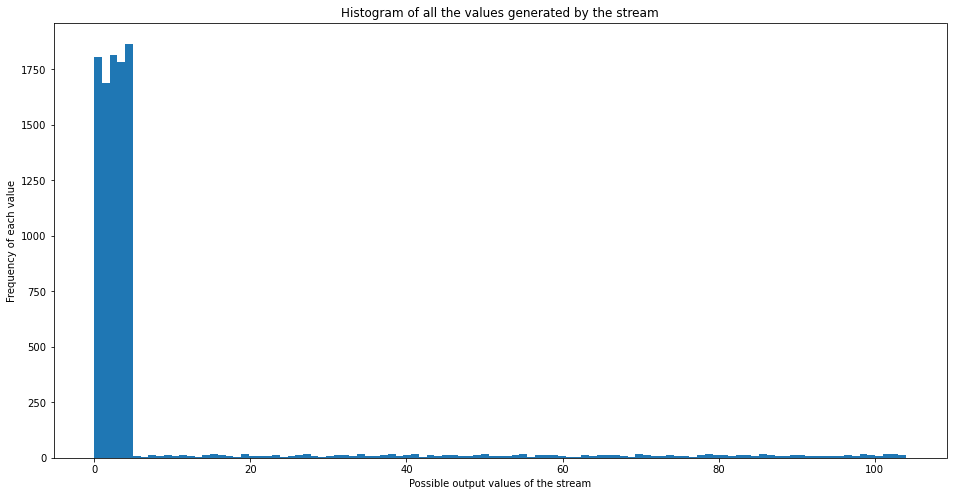

In [4]:
N = int(input('Enter length of stream: '))
k = int(input('Enter the number of most frequent values to find: '))

k_most = K_Most(k)
hist = []
for sample in islice(stream(k), N):
    x,y = k_most.update(sample)
    hist.append(sample)

print(f'\nThe {k} most frequent elements in the stream are: {x}')
plt.figure(figsize=(16,8))
plt.title('Histogram of all the values generated by the stream')
plt.xlabel('Possible output values of the stream')
plt.ylabel('Frequency of each value')
plt.hist(hist, k+100, density=False)
None

## Conclusion

We discussed the working of a streaming algorithm that given the ***length of a stream*** and the ***number of most frequent values*** to find, calculates and displays those many frequently occuring values in the stream with a pictorial view of all the values generated to support the obtained result.